# HW1
# 2. Linear and Quadratic Classifiers 

In [1]:
# ECE-523
# Amir Asdaghpour

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Task 1
Write a general function to generate random samples from N (µ, Σ) in d-dimensions

In [2]:
# task1
def multivariateNormalGenerator(mean, cov, n):
  '''
  mean: a 1-D array of length d
  cov: a 2-D array of shape d x d
  n : samples size to be generated
  returns a 2-D ndarray
  The function generates multivariate gaussian variable
  contains n samples which all share same mean and covariance matrix
  and each multivariate gaussian can be used as a class
  '''
  return np.random.multivariate_normal(mean, cov, n)

# 2. Task2
We are coding up a Generative classifier, the Quadratic Discriminant Analysis(QDA) with an assumption of a Gaussian distribution
 

In [ ]:
# task2
def discriminant(x, mean, sigma, p):
  '''
  x, mean: 1-D array of length d
  sigma: a 2-D array of shape 2 x 2
  p: a scalar
  returns a scalar

  The classifier takes the mean vector and covariance matrix and 
  priori probability of a Multivariate Gaussian variable as 
  a target class and check the Mahalanobis distance of given 
  Data point x, a vector, and returns a scalar number. 
  If we have c classes, we need to call this function For every 
  single class in our sample space. The largest returned number 
  indicates that x  Belongs to that class More likely. 
  '''
  d = len(mean)
  return -mahalanobis(x, mean, sigma)/2 - (d/2)*np.log(2*np.pi) - (np.log(np.linalg.det(sigma))) + (np.log(p))

In [ ]:
def mahalanobis(x, mu, sigma):
  return (x - mu).T @ (np.linalg.inv(sigma)) @ (x - mu)
  

(200, 2)
[ 1.65239141 -0.79555622]
-9.700238677083437
-9.68220729715685


Text(0, 0.5, '$x_2$')

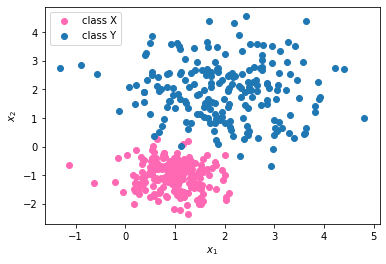

In [ ]:
# test task1: multivariateNormalGenerator() 
mean_x = [1, -1]
mean_y =[2, 2]

cov_x = [[.25,0], [0, 0.25]]
cov_y = [[1,0], [0, 1]]

X = multivariateNormalGenerator(mean_x, cov_x, 200)
print(X.shape)
Y = multivariateNormalGenerator(mean_y, cov_y , 200)

mu_X = np.mean(X, axis = 0)
sigma_X = np.cov(X.T)

mu_Y = np.mean(Y, axis=0)
sigma_Y = np.cov(Y.T)
print(X[65, :])
print(discriminant([ 0.46749257 -1.22840826], mu_X, sigma_X, .01))
print(discriminant([ 0.46749257 -1.22840826], mu_Y, sigma_Y, .99))

plt.scatter(X[:,0], X[:,1], label='class X', c='hotpink')
plt.scatter(Y[:,0], Y[:,1], label='class Y')
plt.legend()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [ ]:
# test task2: discriminant() function
x_test = np.array([-5, 1])
mu_tets = np.array([0,2])
cov_test = [[1,.25], [-.25, 1]]
p_test = 1/3
print(discriminant(x_test, mu_tets, cov_test, p_test))

-15.23240809454095


# 2. Task 3
Generate a 2D dataset with three classes and use the quadratic classifier above to learn the
parameters and make predictions. You should generate training data to estimate the the parameters of the classifier and you should test the classifier
on another randomly generated dataset. It is also sufficient to show the dataset used to train
your classifier and the decision boundary it produces.

Out of 5000 test samples:
 class 1: 1285 samples, class 2: 2176 samples, class3: 1539 samples


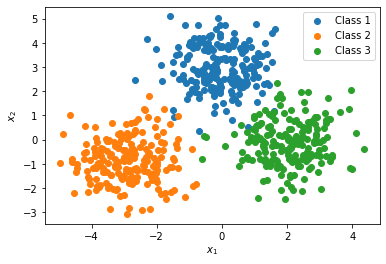

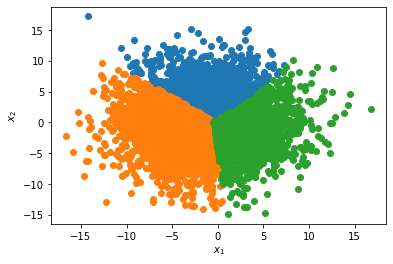

In [ ]:
# task3 

sample_size = 5000

mu_C1 = [0, 3]
mu_C2 = [-3, -1]
mu_C3 = [2, 0]

cov_C1 = [[.25,0], [0, 0.25]]
cov_C2 = [[.75,0],[0,.75]]
cov_C3 = [[1.0, 0], [0, 1.0]]

# Creating a 2D dataset with 3 classes all generated from multivariate gaussian generator
# using mean and class-specific covariance matrices
C1 = multivariateNormalGenerator(mu_C1, cov_C2 , 200)
C2 = multivariateNormalGenerator(mu_C2, cov_C2 , 200)
C3 = multivariateNormalGenerator(mu_C3, cov_C2 , 200)

'''
The only difference between linear discriminant analysis (LDA) and 
quadratic discriminant analysis (QDA) is that LDA does not have 
class-specific covariance matrices, but one shared covariance matrix 
among the classes.

'''
# Exact mean and covariance of each class
mean1 = np.mean(C1, axis = 0)
mean2 = np.mean(C2, axis = 0)
mean3 = np.mean(C3, axis = 0)
cov1 = np.cov(C1.T)
cov2 = np.cov(C2.T)
cov3 = np.cov(C3.T)

p_wi = [1/3,1/3,1/3] # assumed 3 classes have same priori probability
outputs = np.zeros((sample_size,))

# data_test is generated as a Gaussian distribution as well
data_test = multivariateNormalGenerator([-1, 0], [[20.0, 0], [0, 20.0]], sample_size)

class_1 = []
class_2 = []
class_3 = []

for i in range(sample_size):
  # There are c=3 discriminant() functions
  g1 = discriminant(data_test[i], mean1, cov1, p_wi[0])
  g2 = discriminant(data_test[i], mean2, cov2, p_wi[1])
  g3 = discriminant(data_test[i], mean3, cov3, p_wi[2])
  # The classifier is said to assign a feature vector x,data_test[i], to class p_wi if gi(x) > gj(x)
  outputs[i] = np.argmax([g1, g2, g3]) 
  if outputs[i] == 0:
    class_1.append(data_test[i])
  if outputs[i] == 1:
    class_2.append(data_test[i])
  if outputs[i] == 2:
    class_3.append(data_test[i])   

print('Out of %d test samples:\n class 1: %d samples, class 2: %d samples, class3: %d samples'
                % (sample_size,len(class_1), len(class_2), len(class_3)))


plt.figure()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(C1[:,0], C1[:,1], label='Class 1')
plt.scatter(C2[:,0], C2[:,1], label='Class 2')
plt.scatter(C3[:,0], C3[:,1], label='Class 3')
plt.legend()
plt.show()

plt.figure()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(data_test[outputs==0,0], data_test[outputs==0,1])
plt.scatter(data_test[outputs==1,0], data_test[outputs==1,1])
plt.scatter(data_test[outputs==2,0], data_test[outputs==2,1])
plt.show()


# 2. Task 4

In [ ]:
# test for task 4
X_new = multivariateNormalGenerator([0,2], [[5,0],[0,5]], 200)

mean_X = np.mean(X_new , axis = 0)
sigma_X = np.cov(X_new.T)

test_points = 15.0 * np.random.rand(5, 2)

for i in range(5):
  mah_dist = mahalanobis(test_points[i], mean_X, sigma_X)
  print("Mahalanobis distance point x from distribution X is %f" %(mah_dist))



Mahalanobis distance point x from distribution X is 38.475278
Mahalanobis distance point x from distribution X is 26.882528
Mahalanobis distance point x from distribution X is 44.800726
Mahalanobis distance point x from distribution X is 76.239395
Mahalanobis distance point x from distribution X is 22.135331


#2. Task 5
naïve Bayes classifier implementation from scratch


In [ ]:
def likelihood(x, mu, var):
  '''
  x is an example in the train set, d length vector, where d is the number of features in that example
  mu is mean vector of given class, d length vector
  variances of each feature correspond to given class, d length vector
  returns the product log likelihood of all feature for given class
  '''
  likeli = np.zeros((len(x),))
  
  for i in range(len(x)):
    mean = mu[i]
    var_i = var[i]
    x_i = x[i]
    num = np.exp(- (x_i - mean)**2 / (2 * var_i))
    denom = np.sqrt(2 * np.pi * var_i)
    likeli[i] = num/denom
  sum_like = np.prod(likeli)
  log_like = np.log(sum_like)

  return log_like


def myGaussianNB (X,y, Xt,yt):
  '''
  The function is implementation of  naïve Bayes classifier from scratch
  It takes 2 sets of data, training set(X, y), and test set(Xt,yt)
  Both sets come from a Dataset that generated from multivariate gaussian  
  I splitted the Dataset into two sets
  Function returns a list of predictions for each example in the train set
  '''
  n_samples, n_features = X.shape

  # Getting number of classes in train data
  classes = np.unique(y)
  n_classes = len(classes)

  # Creating placeholder for means and variances of train data
  means = np.zeros((n_classes, n_features))
  vars = np.zeros((n_classes, n_features))
  priors =  np.zeros(n_classes, dtype=np.float64)
  
  # Getting mean and variance of each class corresponding to each feature
  # Finding priori probabilities of each class
  for i, c in enumerate(classes):
    X_c = X[y==c]
    means[i, :] = X_c.mean(axis=0)
    vars[i, :] = X_c.var(axis=0)
    priors[i] = X_c.shape[0] / float(n_samples)
  
  print("prior probability of classes in training data:")
  print("class 0 = %f , class 1 = %f , class 2 = %f" %(priors[0], priors[1], priors[2]))
  
  outcomes = np.zeros((Xt.shape[0],))
  # Predictiion process starts here using train set
  for n in range(Xt.shape[0]):
    posts = []
    for i in range(n_classes):
      log_likelih = likelihood(Xt[n], means[i], vars[i])
      log_prior = np.log(priors[i])
      postrior = log_likelih + log_prior
      posts.append(postrior)
    outcomes[n] = np.argmax(posts)
  
  return np.array(outcomes)



In [ ]:
# generating data for task 5
# Creating Samples
samples_class1 = 100
samples_class2 = 200
samples_class3 = 150
covariance_matrix = [[.75,0],[0,.75]]
X_1 = multivariateNormalGenerator([3, 0], covariance_matrix, samples_class1)
X_2 = multivariateNormalGenerator([-3, 0], covariance_matrix, samples_class2)
X_3 = multivariateNormalGenerator([0,3], covariance_matrix, samples_class3)

# Now we concatenate them to create a Dataset
X = np.concatenate((X_1,X_2,X_3), axis=0)

# samples_class1 = 100
# samples_class2 = 200
# samples_class3 = 150
labels = np.zeros(samples_class1 + samples_class2 + samples_class3) 
labels[100: 300] = 1
labels[300:] = 2

# now shuffle the data
idx = np.random.permutation(samples_class1 + samples_class2 + samples_class3)
X = X[idx]
labels = labels[idx]

# Splitting data into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.5, random_state=0)

# Call to myGaussianNb
y_predictions = myGaussianNB(X_train, y_train, X_test, y_test)
print("My implementation of naïve Bayes classifier:")
print("Number of mislabeled points out of total %d points : %d\n" %(X_test.shape[0], (y_test != y_predictions).sum()))


prior probability of classes in training data:
class 0 = 0.208889 , class 1 = 0.475556 , class 2 = 0.315556
My implementation of naïve Bayes classifier:
Number of mislabeled points out of total 225 points : 2



In [ ]:
# Buit-in implementation of naïve Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Buit-in implementation of naïve Bayes classifier:")
print("Number of mislabeled points out of total %d points : %d" %(X_test.shape[0], (y_test != y_pred).sum()))


Buit-in implementation of naïve Bayes classifier:
Number of mislabeled points out of total 225 points : 2


In both implementation we get the same number for the mislabeled point out of test data

# 3. Misc Code
# 3. Problem II: Sampling from a Distribution

In [ ]:
# Sampling function from a Distribution
def sample(p, M):
  '''
  The function takes in a probability distribution p, a list 
  of length n and M, represents the number of indices sampled  
  from the distribution p which should be returned

  '''
  # Get the length of array p
  n = len(p)

  # Check the total probability of set p is 1.0
  sum = 0
  for i in range(n):
    sum += p[i] 
  if sum != 1:
    raise Exception("Total probabilities of set p must be 1.0")  

  # Because the array p starts with index 0, create a new_p array
  # and populate the index 0 with 0.0 which does not change the
  # total probability distribution of the set
  new_p = []
  new_p.append(0.0)
  # Populating rest of elements of new_p from p 
  for i in range(n):
    new_p.append(p[i])

  # Creating a m list for return purpose 
  m = []
  
  # Lopping untill len(m) reaches the M
  while len(m) < M: 
    # Generating a random number between 0.0 and 1.0 
    rs =  np.random.random()
    i = 1 
    # Defining two interval variables to check whether the generated number 
    # belongs to the pi or pj, the algorithm will update its interval 
    xl = new_p[0]
    xh = new_p[1]

    while i <= len(new_p) :    
      if xl <= rs < xh:
        m.append(i)
        break
      else:
        xl = xh 
        i = i + 1
        if xh < 1.0:
          xh = xh + new_p[i]


  return np.array(m)


In [ ]:
# Test1  

# Define distribution p and number of indices that need to be sampled from the distribution p
M = 1000
p = [.1,.2,.3,.4] 
N = len(p) 

print("Set N =", [i+1 for i in range(N)])

print("M = %d" % (M))
print("Priori Probability distribution p before calling sample() function:")
for i in range(1, N +1):
  print("p%d = %f" % (i, p[i-1]))

# Call to the function
sampled_indices = sample(p, M)   
uniq_idx = np.unique(sampled_indices)

# Looping through returned indices sampled from distribution p to find the probabilities 
print("\nProbability distribution of %d indices sampled from distribution p by function sample()" %(M))
for j in range(1, N + 1):
  idx = j
  j = [i for i in sampled_indices if i == j]  
  print("p%d = %f" % (idx, len(j)/sampled_indices.shape[0]))

Set N = [1, 2, 3, 4]
M = 1000
Priori Probability distribution p before calling sample() function:
p1 = 0.100000
p2 = 0.200000
p3 = 0.300000
p4 = 0.400000

Probability distribution of 1000 indices sampled from distribution p by function sample()
p1 = 0.087000
p2 = 0.215000
p3 = 0.292000
p4 = 0.406000


In [ ]:
# Test2  

M = 5000
p = [.05,.05,.05,.05, .05, .05,.05,.05,.05,.05, .5] 
N = len(p)
print("Set N =", [i+1 for i in range(N)])
print("M = %d" % (M))
print("Priori Probability distribution p before calling sample() function:")
for i in range(1, N +1):
  print("p%d = %f" % (i, p[i-1]))
sampled_indices = sample(p, M)    
print("\nProbability distribution of %d indices sampled from distribution p by function sample()" %(M))
for j in range(1, N + 1):
  idx = j
  j = [i for i in sampled_indices if i == j]  
  print("p%d = %f" % (idx, len(j)/sampled_indices.shape[0]))

Set N = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
M = 5000
Priori Probability distribution p before calling sample() function:
p1 = 0.050000
p2 = 0.050000
p3 = 0.050000
p4 = 0.050000
p5 = 0.050000
p6 = 0.050000
p7 = 0.050000
p8 = 0.050000
p9 = 0.050000
p10 = 0.050000
p11 = 0.500000

Probability distribution of 5000 indices sampled from distribution p by function sample()
p1 = 0.051600
p2 = 0.048000
p3 = 0.052600
p4 = 0.048800
p5 = 0.049600
p6 = 0.048600
p7 = 0.051400
p8 = 0.048800
p9 = 0.050000
p10 = 0.050800
p11 = 0.499800


In [ ]:
# Test3  

M = 10000
p = [.6,.1,.3]
N = len(p) 
print("Set N =", [i+1 for i in range(N)])
print("M = %d" % (M))
print("Priori Probability distribution p before calling sample() function:")
for i in range(1, N +1):
  print("p%d = %f" % (i, p[i-1]))
sampled_indices = sample(p, M)    
print("\nProbability distribution of %d indices sampled from distribution p by function sample()" %(M))
for j in range(1, N + 1):
  idx = j
  j = [i for i in sampled_indices if i == j]  
  print("p%d = %f" % (idx, len(j)/sampled_indices.shape[0]))

Set N = [1, 2, 3]
M = 10000
Priori Probability distribution p before calling sample() function:
p1 = 0.600000
p2 = 0.100000
p3 = 0.300000

Probability distribution of 10000 indices sampled from distribution p by function sample()
p1 = 0.595500
p2 = 0.105000
p3 = 0.299500


# 3. Problem I: Comparing Classifiers 

In [ ]:
import numpy as np

from scipy.stats import friedmanchisquare

# Loading data 
dataset = np.loadtxt("hw1-scores.txt", delimiter=',')
# N  data sets
# k  algorithms
N, k = dataset.shape
print("dataset shape :", dataset.shape)
print("The dataset:\n", dataset)
# Calculate statistic
ranks_data = np.zeros((N, k))
# Using argsort to rank data
# Note: argsort() does not take into account the tie cases and get the highest rank on the first occurrence.
for i in range(N):
  ranks_data[i, :] = np.argsort(dataset[i, :])

# since argsort() ranks based on index from 0:
ranks_data = ranks_data + 1.0
print("Ranked dataset:\n", ranks_data)

# Average anks of each classifier
R = []
for i in range(k):
  R.append((np.sum(ranks_data[:, i]))/N)
print("Averaged Rank of classifiers:\n",R)

total_R = np.sum(np.square(R))
# The Friedman test checks whether the measured average ranks are
# significantly different from the mean rank R
X_F_squ = (12 * N) /(k*(k+1)) * (total_R - (k*(k+1)**2)/4.0)
F_F = (((N-1)*X_F_squ)/(N*(k-1)-X_F_squ))

print("\nWith %d classifiers and %d data sets degrees of freedom." %(k, N))
df1 = k - 1
df2 = N - 1 
alpha = 0.050
critical_val = 2.5868 # F Distribution Tables
print("The critical value of F(%d, %d) for α = %f from the F distribution table is %f " %(df1, df2, alpha, critical_val))

# Null hpotheses, H_0: There is no difference between classifiers.
# Alternative hypotheses, H_1: There is a difference between classifiers.
print("F_F = %f" %(F_F))
print("########################\n  FRIEDMAN TEST RESULT:\n")
if F_F > critical_val:
  print("Reject the null hypothesis, H_0")
else:
  print("Fail to reject the Null Hypothesis, H_0")

print("So the classifiers Do NOT perform equally.")  

dataset shape : (27, 6)
The dataset:
 [[24.75 22.75 23.25 22.5  28.25 32.43]
 [ 5.29  4.64  4.5   4.71  3.93  2.63]
 [32.41 26.72 26.9  27.41 32.41 38.61]
 [39.77 39.32 39.55 36.02 43.64 45.06]
 [14.05 12.38 13.33 12.86 17.14 17.12]
 [15.18 14.1  14.68 14.1  16.47 13.84]
 [21.26 20.1  20.19 20.68 28.83 22.2 ]
 [28.89 22.59 25.19 25.19 21.11 26.67]
 [26.61 24.68 23.55 22.9  26.77 42.31]
 [14.69 16.56 15.   14.69 21.56 26.9 ]
 [ 6.06  6.34  5.21  5.07 10.02  6.76]
 [27.93 17.25 17.31 19.38 18.5  18.19]
 [16.82 15.   14.55 14.55 24.24 10.19]
 [ 8.65  8.33  8.65  8.54  9.58  9.37]
 [16.59 15.28 15.66 15.41 20.87 22.75]
 [15.52 15.08 14.43 14.75 17.05 19.02]
 [ 3.23  3.15  3.37  3.21 21.63 27.58]
 [ 8.25 13.   10.   11.75 12.25  9.87]
 [28.25 26.36 26.56 27.21 26.75 28.24]
 [25.14 25.95 26.22 28.11 29.46 49.57]
 [ 1.71  1.54  1.72  1.68  2.11  1.47]
 [27.06 20.   20.59 21.76 28.82 24.01]
 [33.17 35.25 35.97 34.68 32.59 47.14]
 [28.01 27.26 26.62 27.76 27.86 32.11]
 [23.45 20.   21.09 21.45 

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/ece523/hw1/HW1.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ece523/hw1/HW1.ipynb to html
[NbConvertApp] Writing 428656 bytes to /content/drive/MyDrive/ece523/hw1/HW1.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
